<a href="https://colab.research.google.com/github/KunalAyush1/MachineLearningBasicProjects/blob/main/intromodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [ ]:
'''
Steps
0. PreProcess the data + EDA + Feature Selection
1. Extract input and output columns
2. Scale the values
3. Train Test Split
4. Train the model
5. Evaluate the model
6. Deployment of model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df = df.iloc[:,1:]

In [9]:
import matplotlib.pyplot as plt

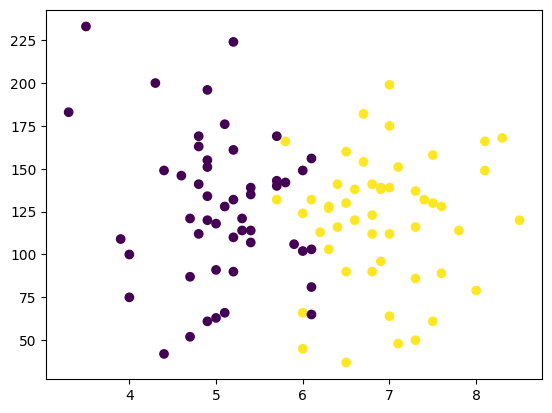

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [30]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [31]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split( X, Y, test_size=0.1, random_state=1)

In [35]:
X_train

,cgpa,iq
92,5.2,110.0
39,4.6,146.0
56,6.1,65.0
52,7.0,175.0
51,4.8,141.0
...,...,...
75,4.8,169.0
9,5.1,66.0
72,7.3,116.0
12,5.4,139.0


In [16]:
X_test

,cgpa,iq
80,4.9,196.0
84,5.7,169.0
33,6.0,149.0
81,5.4,107.0
93,6.8,112.0
17,3.3,183.0
36,5.7,140.0
82,6.5,37.0
69,8.5,120.0
65,8.1,166.0


In [36]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train

array([[-0.70920814, -0.30811838],
       [-1.25475287,  0.61709344],
       [ 0.10910895, -1.46463316],
       [ 0.92742603,  1.36240297],
       [-1.07290463,  0.4885918 ],
       [ 0.92742603,  0.43719114],
       [-1.89122172, -0.33381871],
       [ 1.38204664, -1.56743448],
       [ 0.10910895, -1.05342791],
       [ 0.01818482, -1.97863973],
       [-0.61828402, -0.02541477],
       [-0.98198051, -1.56743448],
       [ 0.65465367,  1.54230527],
       [ 0.01818482, -0.51372101],
       [-0.70920814,  0.25728884],
       [ 0.74557779, -0.82212495],
       [-1.16382875, -1.79873743],
       [ 0.01818482,  0.05168622],
       [-0.61828402, -0.20531707],
       [ 0.47280543,  0.97689804],
       [-0.89105639, -0.10251575],
       [ 0.20003307, -0.2310174 ],
       [ 0.38188131,  0.4885918 ],
       [-1.52752523,  2.00491118],
       [-1.43660111,  0.69419443],
       [-0.98198051,  0.3086895 ],
       [ 0.56372955,  0.41149081],
       [-1.07290463, -0.25671773],
       [-1.16382875,

In [38]:
X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf  = LogisticRegression()

In [41]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [45]:
y_pred=clf.predict(X_test)

In [43]:
Y_test

,placement
80,0
84,0
33,0
81,0
93,1
17,0
36,0
82,1
69,1
65,1


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9

In [47]:
#visualising the decisiom boundary of our model
from mlxtend.plotting import plot_decision_regions

<Axes: >

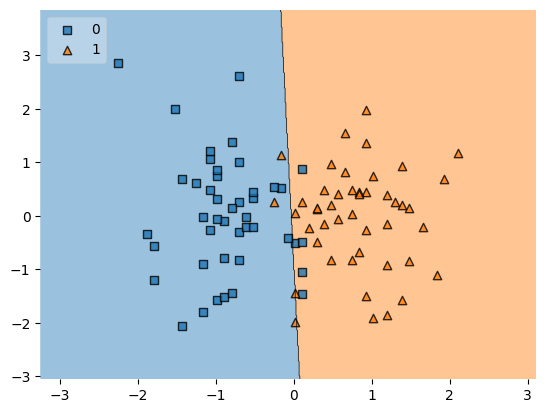

In [48]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [49]:
#deployment
import pickle

In [50]:
pickle.dump(clf,open('model.pkl','wb'))